In [1]:
#ussing of a function tranformer
#checking for density
#checking for skewness
#checking for change in prediction and accuracy values


In [25]:
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [12]:
df=sns.load_dataset('tips')
df=df[['total_bill','tip','size']]
df.sample(30)

,total_bill,tip,size
162,16.21,2.00,3
3,23.68,3.31,2
85,34.83,5.17,4
108,18.24,3.76,2
57,26.41,1.50,2
105,15.36,1.64,2
169,10.63,2.00,2
9,14.78,3.23,2
199,13.51,2.00,2
26,13.37,2.00,2


In [13]:
df.isnull().sum()

,0
total_bill,0
tip,0
size,0


In [30]:
#feature selection
fea=df.drop(columns=['total_bill'])
tar=df['total_bill']

xtrain,xtest,ytrain,ytest=train_test_split(fea,tar,test_size=0.2,random_state=30)


In [46]:
pd.DataFrame(xtrain)

,tip,size
24,3.18,2
200,4.00,3
21,2.75,2
139,2.75,2
135,1.25,2
...,...,...
140,3.50,2
45,3.00,2
173,3.18,2
165,3.48,3


In [35]:
model=LinearRegression()
model.fit(xtrain,ytrain)

prediction=model.predict(xtest)
print("your prediction score is:",prediction)

accuracy=model.score(xtest,ytest)
print("/n/n you model accuracy score is",accuracy)

your prediction score is: [16.78467415 11.34731496 16.59673534 13.33912934  8.46558658 11.77297261
 18.03759953 18.77648853 24.6523716  18.96442733 14.90528607 14.90528607
 21.34498556 28.84967163 14.99925547 27.03292983 37.53177058 27.78468506
 14.77999353 43.44625236 23.22437364 18.36928778 17.14768553 19.54110999
 13.24515994 12.08620396 24.47729902 18.69538536 16.4714428  14.27882338
 21.42049807 18.53876968 14.90528607 27.95975763 14.90528607 13.33912934
 14.90528607 16.4714428  16.4714428  16.4714428  31.44949181 13.33912934
 19.25920178 18.28818461 24.93427981 13.74633009 18.03759953 15.62571817
 34.66290844]
/n/n you model accuracy score is 0.657332621351953


<Axes: xlabel='tip', ylabel='Count'>

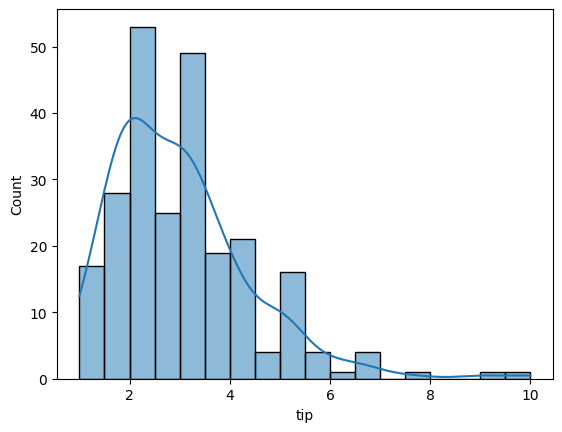

In [18]:
sns.histplot(df['tip'],kde=True)

((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

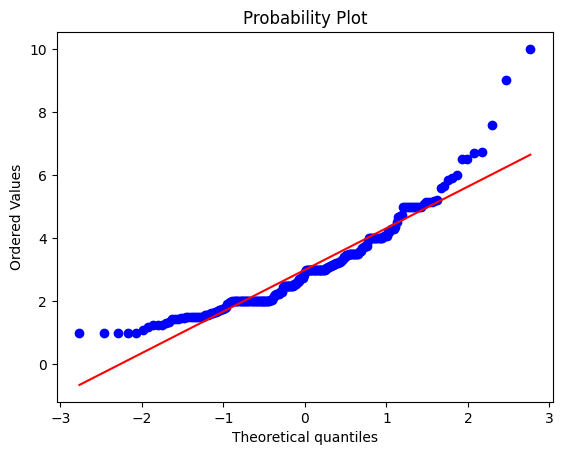

In [24]:
stats.probplot(df['tip'],plot=plt)

In [33]:
#these are the graph of tip column before function transformer
#now we will seeafter using hoe it goes

ct=ColumnTransformer(
    transformers=
   [ ('t1',FunctionTransformer(np.log1p),['tip']),
    ('t2',StandardScaler(),['tip'])
    ] ,remainder='passthrough'
)

xtrainnew=ct.fit_transform(xtrain)
xtestnew=ct.transform(xtest)


In [38]:
model1=LinearRegression()
model1.fit(xtrainnew,ytrain)

prediction1=model1.predict(xtestnew)
print("your prediction score is:",prediction1)

acuuracy1=model1.score(xtestnew,ytest)
print("/n/n  your accurracy is:",acuuracy1)

your prediction score is: [16.73522252 11.37352191 16.55199119 13.45385754  8.73034068 12.04142236
 17.96597953 18.77250816 24.58814288 18.95314188 14.92254666 14.92254666
 21.27706121 28.79940922 15.01203083 26.96272923 37.53129797 27.72051178
 14.80344929 43.96467127 23.1483855  18.38284383 17.22983137 19.46094556
 13.3672979  12.31817479 24.40943011 18.61784025 16.43005609 14.32964743
 21.35166387 18.462311   14.92254666 27.89922456 14.92254666 13.45385754
 14.92254666 16.43005609 16.43005609 16.43005609 31.45541079 13.45385754
 19.17932298 18.21388031 24.86706894 13.83118367 17.96597953 15.61192129
 34.67001309]
/n/n  your accurracy is: 0.6564080610979618


<Axes: ylabel='Count'>

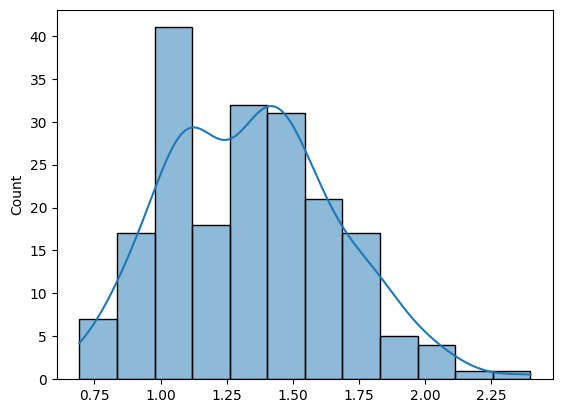

In [48]:
sns.histplot(xtrainnew[:,0],kde=True)


((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

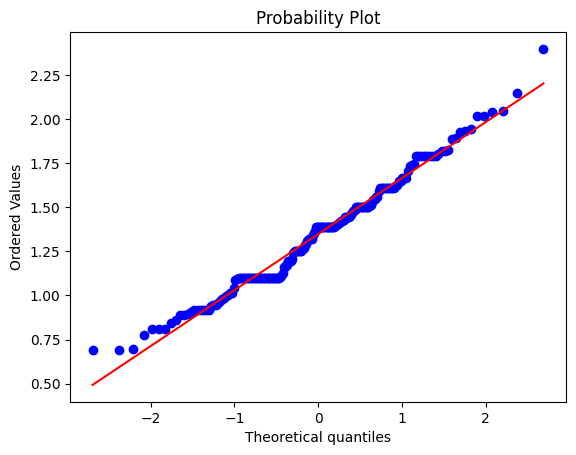

In [45]:
stats.probplot(xtrainnew[:,0],plot=plt)